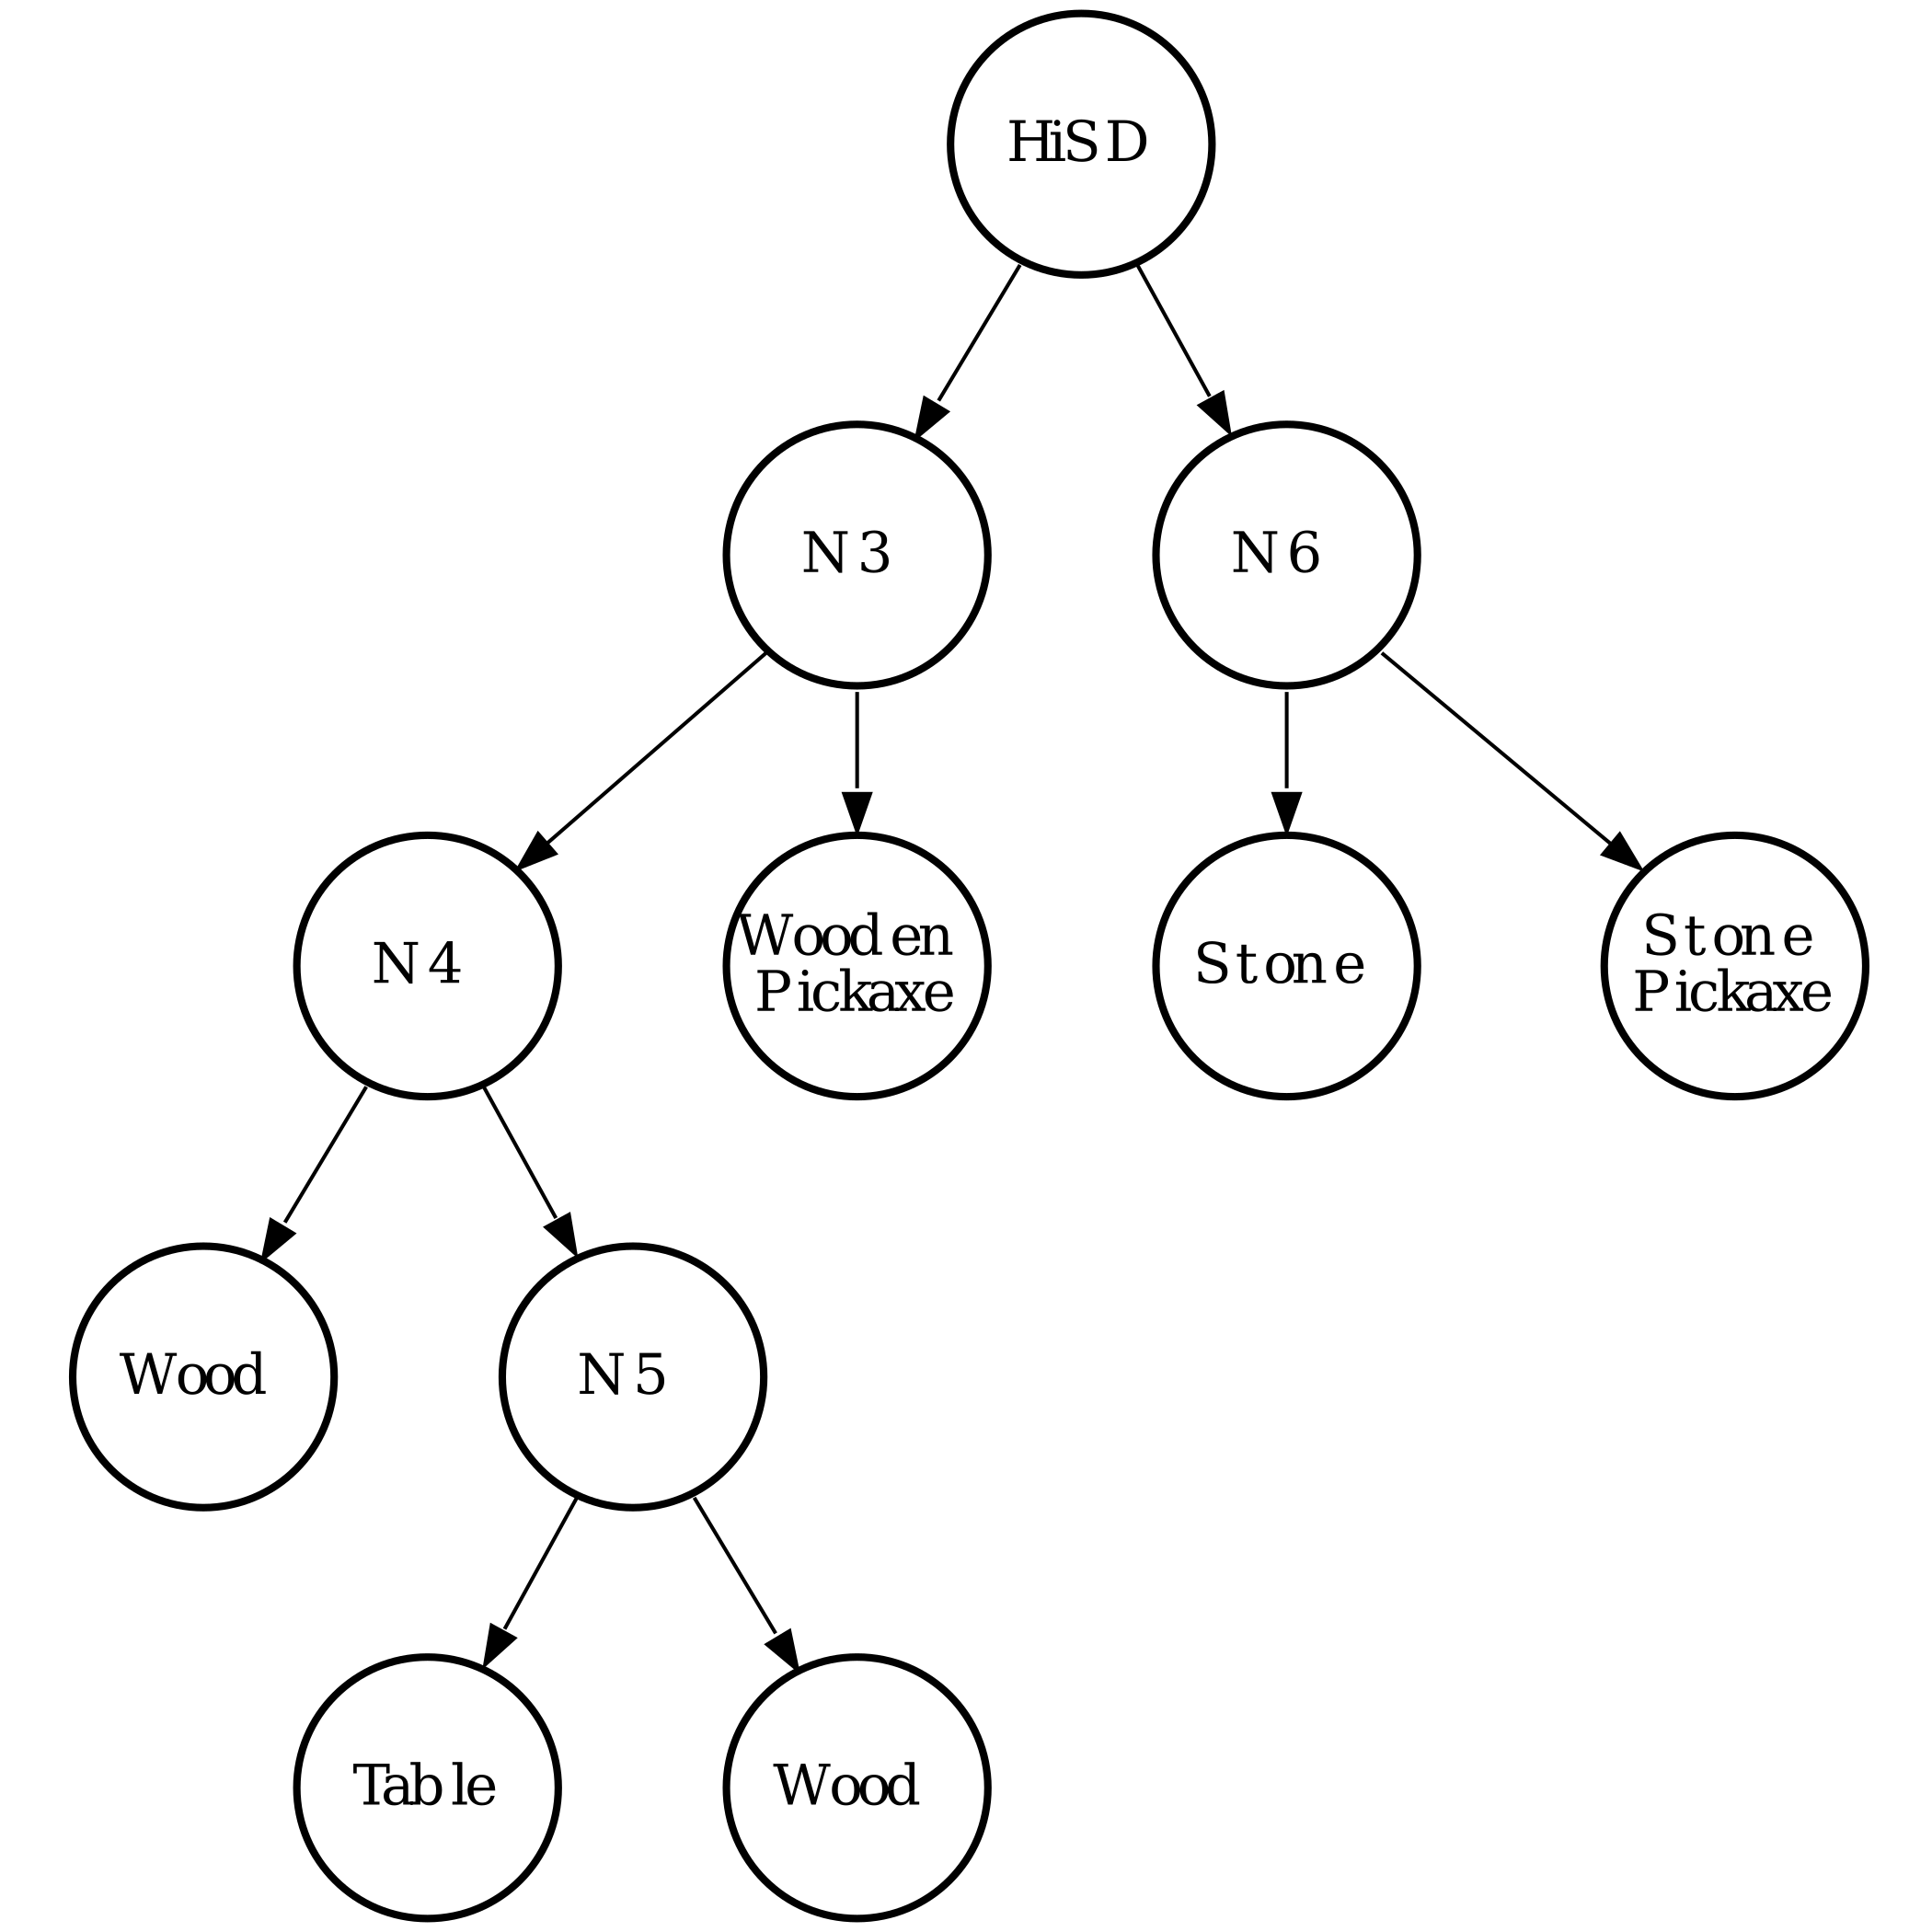

In [28]:
from graphviz import Digraph
from IPython.display import Image, display

def draw_tree(tree):
    dot = Digraph(format='pdf')
    dot.attr(rankdir="TB")  # Keep Top-to-Bottom
    dot.attr("graph",
             dpi="300",
             margin="0",
             pad="0.01",
             size="7,7!",
             ratio="1",
             nodesep="0.025",   # Reduced horizontal space between nodes
             ranksep="0.000005")  # Reduced vertical space between levels
    dot.attr("node",
             shape="circle",
             fontsize="3",    # Slightly smaller font
             fixedsize="true",
             width="0.2",     # Slightly smaller node width
             height="0.2",
             penwidth="0.4")   # Thinner node borders)
    
    dot.attr("edge",
             arrowsize="0.2",   #  default is 1.0; smaller → smaller arrowheads
             penwidth="0.2")    # thinner lines

    def recurse(node, parent_id=None):
        node_id = str(id(node))
        if "label" in node:
            label = str(node["label"])
        elif "production" in node:
            label = f"{node['production']}"
        elif "symbol" in node:
            label = f"{node['symbol']}"
        else:
            label = "?"

        dot.node(node_id, label)
        if parent_id is not None:
            dot.edge(parent_id, node_id)
        for child in node.get("children", []):
            recurse(child, node_id)

    recurse(tree)
    dot.render(filename="predicted_stone_pick_static.pdf", cleanup=True)
    display(Image(dot.pipe(format='png')))


# Example call
draw_tree({
  # "production": "N1",
  # "children": [
  #   {
      "production": "HiSD",
      "children": [
        {
          "production": "N3",
          "children": [
            {
              "production": "N4",
              "children": [
                {
                  "symbol": "Wood"
                },
                {
                  "production": "N5",
                  "children": [
                    {
                      "symbol": "Table"
                    },
                    {
                      "symbol": "Wood"
                    }
                  ]
                }
              ]
            },
            {
              "production": "Wooden\nPickaxe",
            }
          ]
        },
        {
          "production": "N6",
          "children": [
            {
              "symbol": "Stone"
            },
            {
              "symbol": "Stone\nPickaxe"
            }
          ]
        }
      ]
    # }
  # ]
})
